In [2]:
#FINAL Notebook

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [21]:
df = pd.read_csv(r'C:\Users\taylo\Desktop\GA\Week 4\project_2\datasets\train.csv')

In [22]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [23]:
df.count()

Id                2051
PID               2051
MS SubClass       2051
MS Zoning         2051
Lot Frontage      1721
Lot Area          2051
Street            2051
Alley              140
Lot Shape         2051
Land Contour      2051
Utilities         2051
Lot Config        2051
Land Slope        2051
Neighborhood      2051
Condition 1       2051
Condition 2       2051
Bldg Type         2051
House Style       2051
Overall Qual      2051
Overall Cond      2051
Year Built        2051
Year Remod/Add    2051
Roof Style        2051
Roof Matl         2051
Exterior 1st      2051
Exterior 2nd      2051
Mas Vnr Type      2029
Mas Vnr Area      2029
Exter Qual        2051
Exter Cond        2051
                  ... 
Half Bath         2051
Bedroom AbvGr     2051
Kitchen AbvGr     2051
Kitchen Qual      2051
TotRms AbvGrd     2051
Functional        2051
Fireplaces        2051
Fireplace Qu      1051
Garage Type       1938
Garage Yr Blt     1937
Garage Finish     1937
Garage Cars       2050
Garage Area

In [24]:
column_names = df.columns

In [25]:
column_names

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [26]:
#Data Cleaning
df.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [91]:
#Data Cleaning
df.isna

<bound method DataFrame.isna of         Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
5      138  535126040           20        RL         137.0     16492   Pave   
6     2827  908186070          180        RM          35.0      3675   Pave   
7      145  535154050           20        RL           NaN     12160   Pave   
8     1942  535353130           20        RL           NaN     15783   Pave   
9     1956  535426130           60        RL          70.0     11606   Pave   
10    1044  527451290          160        RM          21.0      1680   Pave   
11    2752  90638015

In [28]:
#Data Cleaning
df.loc[:, df.isna().any()]

,Lot Frontage,Alley,Mas Vnr Type,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,...,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Pool QC,Fence,Misc Feature
0,NaN,NaN,BrkFace,289.0,TA,TA,No,GLQ,533.0,Unf,...,Attchd,1976.0,RFn,2.0,475.0,TA,TA,NaN,NaN,NaN
1,43.0,NaN,BrkFace,132.0,Gd,TA,No,GLQ,637.0,Unf,...,Attchd,1997.0,RFn,2.0,559.0,TA,TA,NaN,NaN,NaN
2,68.0,NaN,None,0.0,TA,TA,No,GLQ,731.0,Unf,...,Detchd,1953.0,Unf,1.0,246.0,TA,TA,NaN,NaN,NaN
3,73.0,NaN,None,0.0,Gd,TA,No,Unf,0.0,Unf,...,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,NaN,NaN,NaN
4,82.0,NaN,None,0.0,Fa,Gd,No,Unf,0.0,Unf,...,Detchd,1957.0,Unf,2.0,484.0,TA,TA,NaN,NaN,NaN
5,137.0,NaN,None,0.0,TA,TA,No,ALQ,247.0,Rec,...,Attchd,1966.0,Fin,2.0,578.0,TA,TA,NaN,NaN,NaN
6,35.0,NaN,BrkFace,82.0,Gd,TA,Gd,GLQ,547.0,Unf,...,Basment,2005.0,Fin,2.0,525.0,TA,TA,NaN,NaN,NaN
7,NaN,NaN,BrkFace,180.0,TA,TA,No,Rec,1000.0,Unf,...,Attchd,1959.0,RFn,2.0,531.0,TA,TA,NaN,MnPrv,NaN
8,NaN,NaN,None,0.0,TA,TA,No,Rec,292.0,Unf,...,Detchd,1952.0,Unf,1.0,420.0,TA,TA,NaN,MnPrv,Shed
9,70.0,NaN,BrkFace,192.0,Gd,TA,Av,Rec,650.0,Unf,...,Attchd,1969.0,Unf,2.0,504.0,TA,TA,NaN,NaN,NaN


In [29]:
#Data Cleaning
len(df.loc[0, df.isna().any()])

26

In [30]:
#Data Cleaning
df.loc[0, df.isna().any()]

Lot Frontage          NaN
Alley                 NaN
Mas Vnr Type      BrkFace
Mas Vnr Area          289
Bsmt Qual              TA
Bsmt Cond              TA
Bsmt Exposure          No
BsmtFin Type 1        GLQ
BsmtFin SF 1          533
BsmtFin Type 2        Unf
BsmtFin SF 2            0
Bsmt Unf SF           192
Total Bsmt SF         725
Bsmt Full Bath          0
Bsmt Half Bath          0
Fireplace Qu          NaN
Garage Type        Attchd
Garage Yr Blt        1976
Garage Finish         RFn
Garage Cars             2
Garage Area           475
Garage Qual            TA
Garage Cond            TA
Pool QC               NaN
Fence                 NaN
Misc Feature          NaN
Name: 0, dtype: object

In [102]:
#Data Cleaning
df.Fence.isna().sum()

1651

In [104]:
#Data Cleaning
df.Fence.fillna(0, inplace=True)

In [105]:
#Data Cleaning
df.Fence.isna().sum()

0

In [ ]:
#Imputing
For a lot of the columns NAN values likely applied to houses that just did not have those features, particularly pool, firepalce and garage. 

In [108]:
#Creating Dummy variable for PP+M
pd.get_dummies(df['Garage Cars'])

,0.0,1.0,2.0,3.0,4.0,5.0
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
5,0,0,1,0,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0
8,0,1,0,0,0,0
9,0,0,1,0,0,0


In [92]:
from scipy import stats
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [32]:
#Set features
num_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [33]:
df_zscore = scipy.stats.zscore(num_features as array, axis=1)

SyntaxError: invalid syntax (<ipython-input-33-139fcd9d5b25>, line 1)

In [35]:
z = np.abs(stats.zscore(numeric_columns))
len(z)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [34]:
#Set numeric columns - EDA
numeric_columns = df.select_dtypes(include=[np.number]).columns

In [36]:
#Apply Z score to new DF -EDA
zscoredf = df[numeric_columns].apply(zscore)

In [89]:
#Look at Zscores - EDA
zscoredf.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,-1.617770,-0.955430,0.069866,NaN,0.512071,-0.078644,2.207728,0.142227,0.989479,NaN,...,-0.730121,-0.053301,-0.377264,-0.102738,-0.287856,-0.06348,-0.089968,-1.173402,1.695731,-0.643237
1,-1.102229,-0.965889,0.069866,NaN,0.211664,0.622656,-0.509102,0.805126,0.609090,NaN,...,-0.730121,0.396266,-0.377264,-0.102738,-0.287856,-0.06348,-0.089968,-0.808979,0.933358,0.486252
2,-1.565623,-0.945082,-0.864413,NaN,-0.317944,-0.779944,1.302118,-0.620106,1.084576,NaN,...,-0.730121,0.066584,-0.377264,-0.102738,-0.287856,-0.06348,-0.089968,-1.902247,1.695731,-0.914567
3,-1.370073,1.075009,0.069866,NaN,-0.039047,-0.779944,-0.509102,1.136575,1.084576,NaN,...,0.047980,-0.712665,-0.377264,-0.102738,-0.287856,-0.06348,-0.089968,-0.808979,1.695731,-0.094268
4,-1.444738,1.022207,-0.163704,NaN,0.618586,-0.078644,2.207728,-2.376787,0.418896,NaN,...,-0.730121,0.171483,-0.377264,-0.102738,-0.287856,-0.06348,-0.089968,-1.173402,1.695731,-0.542277


In [38]:
#Evaluate Zscores- EDA
(zscoredf >= 3).values.sum()

607

In [ ]:
#Not worth it to remove outliers since so it comprises so much of training dataset and since so many outliers fell even further outside outlier range it suggests that the data is not normally distributed.  

In [39]:
#Evaluate Zscores- EDA
(zscoredf >= 4).values.sum()

277

In [93]:
from pandas import DataFrame

In [94]:
#Set interaction terms - EDA/PPM
interactionterms = DataFrame(df,columns= ['Full Bath', 'Bedroom AbvGr'])

In [45]:
#Set X and Y variables - EDA/PPM
X = interactionterms
y = df.SalePrice

In [46]:
# Create linear regression
regr = LinearRegression()

# Fit the linear regression
model = regr.fit(X, y)

In [47]:
#Set predictions - EDA
predictions = model.predict(X)

Text(0, 0.5, 'Sale Price')

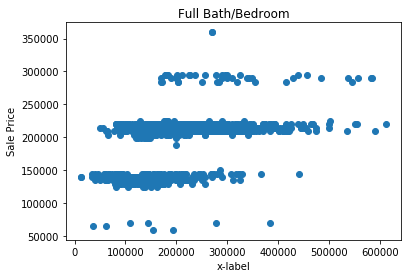

In [110]:
#Plot predictions - doesn't look good! - EDA
plt.scatter(y, predictions)
plt.title("Full Bath/Bedroom")
plt.xlabel("Interaction Terms")
plt.ylabel("Sale Price")

In [49]:
#First interaction terms no good - went back and created two diff ones - EDA/PPM
interactionterms2 = DataFrame(df,columns= ['Gr Liv Area', 'Bedroom AbvGr'])

In [132]:
#Set new interaction terms - EDA/PPM
X2 = interactionterms2
y2 = df.SalePrice

In [112]:
# Create linear regression
regr2 = LinearRegression()

# Fit the linear regression
model2 = regr2.fit(X2, y2)

In [113]:
#Set predictions - EDA/PPM
predictions2 = model2.predict(X2)

Text(0, 0.5, 'Sale Price')

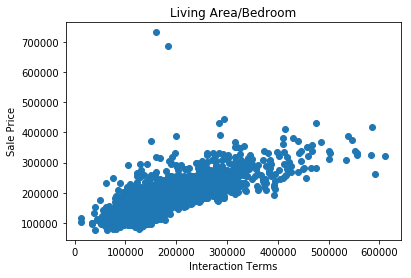

In [114]:
#Plotted model and went back and labeled title/X axis/Y axis - EDA/Visualizations
plt.scatter(y2, predictions2)
plt.title("Living Area/Bedroom")
plt.xlabel("Interaction Terms")
plt.ylabel("Sale Price")

In [135]:
with sns.color_palette('summer'):
    sns.lmplot(X2="Independent", y2="Dependent", data=df)

TypeError: lmplot() got an unexpected keyword argument 'X2'

In [54]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [55]:
#Got model 2 score: ok but not great - PPM/Evaluation
model2.score(X2, y2)

0.5491392107242926

In [56]:
#Got model 2 intercept which gave me an idea of the baseline of what a house is worth - PPM/Evaluation
model2.intercept_

60363.20758250935

In [57]:
#Got model 2 coefficient which let me know the value of my interaction terms - PPM/Evaluation 
model2.coef_

array([   133.86336838, -27993.36510502])

In [59]:
#Isolated feature to get better sense of value of Gr Liv Area - PPM/Evaluation
model3XA = DataFrame(df,columns= ['Gr Liv Area'])

In [60]:
#Isolated feature to get better sense of value of Bedroom AbvGr - PPM/Evaluation
model3XB = DataFrame(df,columns= ['Bedroom AbvGr'])

In [61]:
#Set new variables - PPM
X3 = df['Bedroom AbvGr']
y3 = df.SalePrice

In [62]:
#Set new Model - PPM
model3 = regr.fit(model3XA, y3)

In [63]:
#Checked on M3 - PPM
model3

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
#Checked Model 3 score - not great - PPM/Evaluation
model3.score(model3XA, y3)

0.48586259284005934

In [65]:
#Checked Model 3 intercept for baseline -Evaluation
model3.intercept_

15952.97123587929

In [66]:
#Checked coefficient of Gr Liv Area
model3.coef_

array([110.39379004])

In [67]:
#Fit M4 
model4 = regr.fit(model3XB, y3)

In [68]:
#Checked M4 score, not great 
model4.score(model3XB, y3)

0.01878734507262847

In [69]:
#Set predictions - PPM
predictions4 = model4.predict(model3XB)

Text(0, 0.5, 'Sale Price')

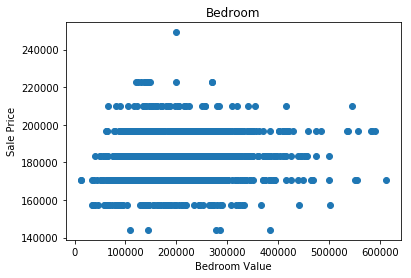

In [115]:
plt.scatter(y2, predictions4)
plt.title("Bedroom")
plt.xlabel("Bedroom Value")
plt.ylabel("Sale Price")

In [116]:
#Ran correlation Matrix - EDA/Evaluation
df.corr()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,...,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,...,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS SubClass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,...,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot Frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,...,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
Lot Area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,...,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall Qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,...,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall Cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,...,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year Built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,...,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year Remod/Add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,...,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas Vnr Area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,...,0.163584,0.163489,-0.107104,0.011161,0.086631,0.012422,0.079219,-0.001472,-0.018719,0.512230


In [72]:
#Ranked correlations - EDA/Evaluation
df.corr().sort_values(by='SalePrice').SalePrice

PID               -0.255052
Enclosed Porch    -0.135656
Kitchen AbvGr     -0.125444
Overall Cond      -0.097019
MS SubClass       -0.087335
Id                -0.051398
Bsmt Half Bath    -0.045328
Low Qual Fin SF   -0.041594
Yr Sold           -0.015203
Misc Val          -0.007375
BsmtFin SF 2       0.016255
Pool Area          0.023106
Mo Sold            0.032735
3Ssn Porch         0.048732
Screen Porch       0.134581
Bedroom AbvGr      0.137067
Bsmt Unf SF        0.190210
2nd Flr SF         0.248452
Half Bath          0.283001
Bsmt Full Bath     0.283662
Lot Area           0.296566
Wood Deck SF       0.326490
Open Porch SF      0.333476
Lot Frontage       0.341842
BsmtFin SF 1       0.423519
Fireplaces         0.471093
TotRms AbvGrd      0.504014
Mas Vnr Area       0.512230
Garage Yr Blt      0.533922
Full Bath          0.537969
Year Remod/Add     0.550370
Year Built         0.571849
1st Flr SF         0.618486
Total Bsmt SF      0.628925
Garage Cars        0.648220
Garage Area        0

In [120]:
import seaborn as sns

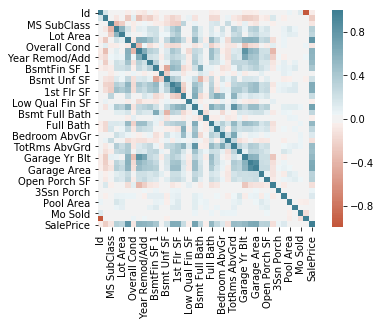

In [121]:
#Add correlation heatmap
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

In [ ]:
sns.pairplot(df)

In [73]:
#Found average of Overall Quality to give me a sense of the scale - EDA/Evaluation
df['Overall Qual'].mean()

6.1121404193076545

In [74]:
#Set the two highest features as interaction terms - EDA/PPM/Evaluation
interactiontermsFINAL = DataFrame(df,columns= ['Overall Qual', 'Bedroom AbvGr'])

In [76]:
#Set my X and Y variables for a mode - PPM
XFINAL = interactiontermsFINAL
y2 = df.SalePrice

In [77]:
# Create linear regression
regrFINAL = LinearRegression()

# Fit the linear regression
modelFINAL = regrFINAL.fit(XFINAL, y2)

In [138]:
modelFINAL.coef_

array([44187.28771101,  9073.15163331])

In [78]:
#Set my predictions - PPM
predictionsFINAL = modelFINAL.predict(XFINAL)

Text(0, 0.5, 'Sale Price')

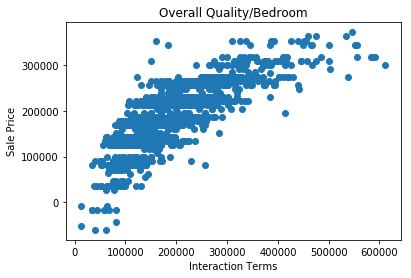

In [117]:
plt.scatter(y2, predictionsFINAL)
plt.title("Overall Quality/Bedroom")
plt.xlabel("Interaction Terms")
plt.ylabel("Sale Price")

In [139]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

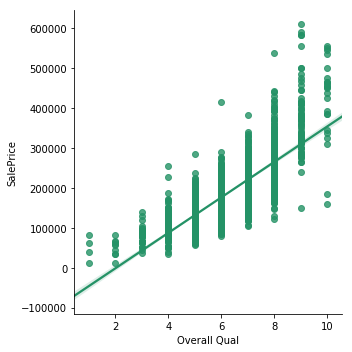

In [143]:
#Third Visualization
with sns.color_palette('summer'):
    sns.lmplot(x="Overall Qual", y="SalePrice", data=df)

In [80]:
#Got final model score- not bad - PPM/Evaluation
modelFINAL.score(XFINAL, y2)

0.6492598545489272

In [81]:
#Got model intercept - PPM/Evaluation
modelFINAL.intercept_

-114408.63045866956

In [82]:
#Got final model coef - PPM/Evaluation
modelFINAL.coef_

array([44187.28771101,  9073.15163331])

In [144]:
#SetNBPrice for groupby
dfNBPrice = df.groupby(['Neighborhood'], as_index=False).mean()[['SalePrice', 'Neighborhood']]

In [145]:
#Sorted values by SalePrice
dfNBPrice = dfNBPrice.sort_values("SalePrice")

In [146]:
#Counted NB Price
dfNBPrice.count()

SalePrice       28
Neighborhood    28
dtype: int64

In [86]:
result = dfNBPrice.rank

In [87]:
result

<bound method NDFrame.rank of         SalePrice Neighborhood
13  100231.250000      MeadowV
11  101103.188406       IDOTRR
2   103371.052632       BrDale
20  125276.300613      OldTown
3   127022.697368      BrkSide
7   130493.468531      Edwards
21  134758.875000        SWISU
12  137000.000000      Landmrk
22  137181.909910       Sawyer
16  140476.470588      NPkVill
1   144566.666667      Blueste
15  145905.816129        NAmes
14  167656.707317      Mitchel
23  187760.160920      SawyerW
9   188666.666667       Greens
8   189228.387931      Gilbert
17  194619.022989       NWAmes
0   200417.681818      Blmngtn
5   202497.216667      CollgCr
6   205901.211268      Crawfor
4   217490.074074      ClearCr
24  227183.900000      Somerst
26  241051.354167       Timber
27  253570.588235      Veenker
10  280000.000000      GrnHill
18  316294.125000      NoRidge
19  322831.352459      NridgHt
25  329675.736842      StoneBr>

In [88]:
#Going to seek lambda help
df.NBRank = map(lambda x: , df.Neighborhood)

SyntaxError: invalid syntax (<ipython-input-88-e05af8b04f78>, line 1)